## About Dataset

## Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Getting the data

In [11]:
def read_data():
    try:
        data = pd.read_csv("C:/Kaggle_dataset/Placement Dataset/placement-dataset.csv")
        return data
    except Exception as e:
        print("Data Path Not Found and Error is in the read_data Function")


## calling of the read_data function

In [12]:
df = read_data()
print(df.head())

   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0


## Preprocessing and Feature Engineering

### i) Copying or Cloning original data into df1 variables.
### ii) Displaying the first five rows for understanding of columns wheather it is categorical or numerical.
### iii) Findout the data types of variables.
### iv) Total number of rows and columns.

In [13]:
df1 = df.copy()
print(df1.head())
print(df1.info())
print(df1.shape)

   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None
(100, 4)


### v) Statistics of a numerical variables min,max,nan values,average.

In [14]:
print(df1.describe())

       Unnamed: 0        cgpa          iq   placement
count  100.000000  100.000000  100.000000  100.000000
mean    49.500000    5.991000  123.580000    0.500000
std     29.011492    1.143634   39.944198    0.502519
min      0.000000    3.300000   37.000000    0.000000
25%     24.750000    5.075000  101.500000    0.000000
50%     49.500000    6.000000  127.500000    0.500000
75%     74.250000    6.900000  149.000000    1.000000
max     99.000000    8.500000  233.000000    1.000000


### vi) checking of null values

In [15]:
df1.isna().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

### vii) checking of Duplicate rows

In [16]:
df1.duplicated().sum()

0

### viii) To find out unique values in the dataset

In [17]:
cols =  ['cgpa', 'iq', 'placement']
for i in cols:
    print("The number of",i , "Values")
    print(df1[i].sort_values().unique())
    print("*********************************")

The number of cgpa Values
[3.3 3.5 3.9 4.  4.3 4.4 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.7 5.8 5.9
 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.3 7.4 7.5 7.6 7.8 8.
 8.1 8.3 8.5]
*********************************
The number of iq Values
[ 37.  42.  45.  48.  50.  52.  61.  63.  64.  65.  66.  75.  79.  81.
  86.  87.  89.  90.  91.  96. 100. 102. 103. 106. 107. 109. 110. 112.
 113. 114. 116. 118. 120. 121. 123. 124. 127. 128. 130. 132. 134. 135.
 137. 138. 139. 140. 141. 142. 143. 146. 149. 151. 154. 155. 156. 158.
 160. 161. 163. 166. 168. 169. 175. 176. 182. 183. 196. 199. 200. 224.
 233.]
*********************************
The number of placement Values
[0 1]
*********************************


# Visualization through Seaborn and Matplotlib.

### i) Counting of placement values using bar plot

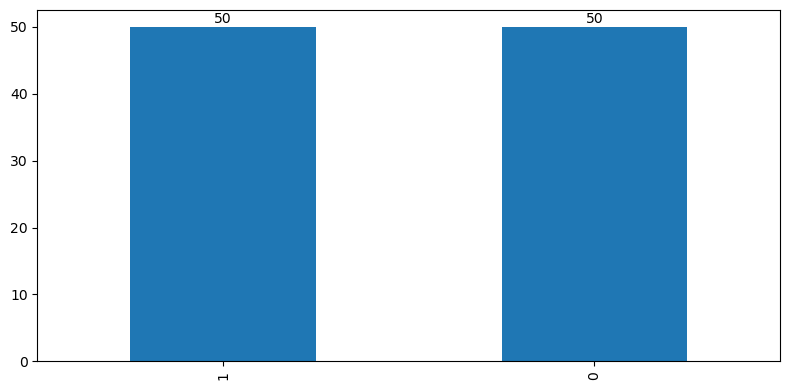

In [18]:
plt.figure(figsize=(8,4))
placement_value_counts = df1['placement'].value_counts()
placement_value_counts.plot(kind='bar')
for index, value in enumerate(placement_value_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

### ii) Relation Between Cumulative Grade Point Average (cgpa) and Intelligence Quotient (iq) values 

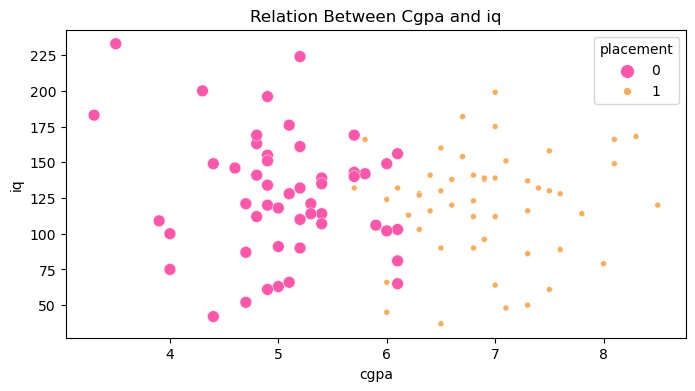

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df1,x ='cgpa',y='iq',hue='placement',size='placement',palette='spring')
plt.title("Relation Between Cgpa and iq")
plt.show()

### iii) To findout outliers in a numerical values.

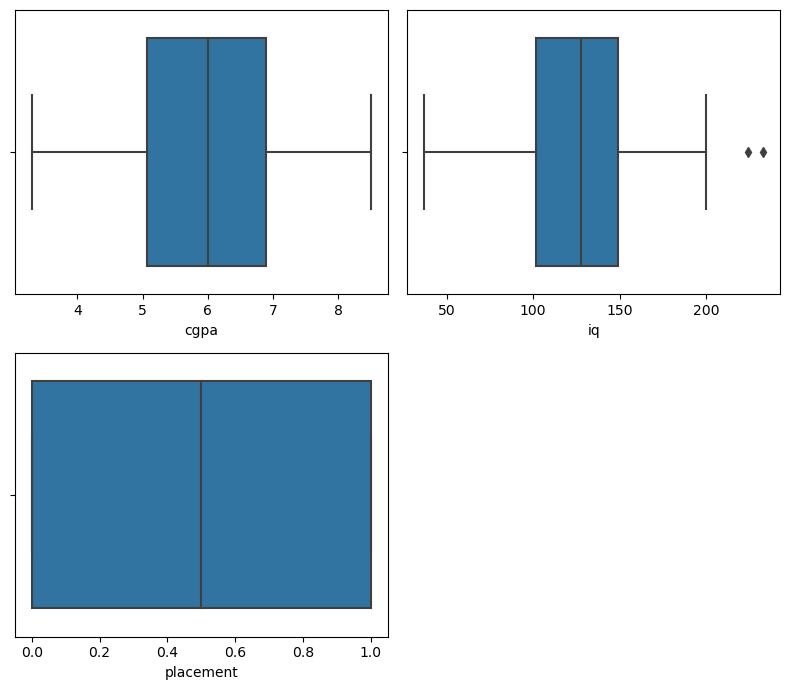

In [20]:
cols = ['cgpa', 'iq', 'placement']
plt.figure(figsize=(8,7))
for i,col in enumerate(cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(data = df1,x = col)
plt.tight_layout()
plt.show()

### Inferance :- There are two outliers in the Intelligence Quotient (iq) columns let's see will be there impact on model.

In [21]:
Q1 = df1['iq'].quantile(0.25)
Q1

Q3 = df1['iq'].quantile(0.75)
Q3

IQR = Q3 - Q1
IQR
lower = Q1 - 1.5 * IQR
print("The lower value is:",lower)
upper = Q3 + 1.5 * IQR
print("The upper value is:",upper)

a = df1[df1['iq']>220]
print(a)

The lower value is: 30.25
The upper value is: 220.25
    Unnamed: 0  cgpa     iq  placement
16          16   5.2  224.0          0
50          50   3.5  233.0          0


### iv) Co-relation Between Numerical Values by using heatmap.

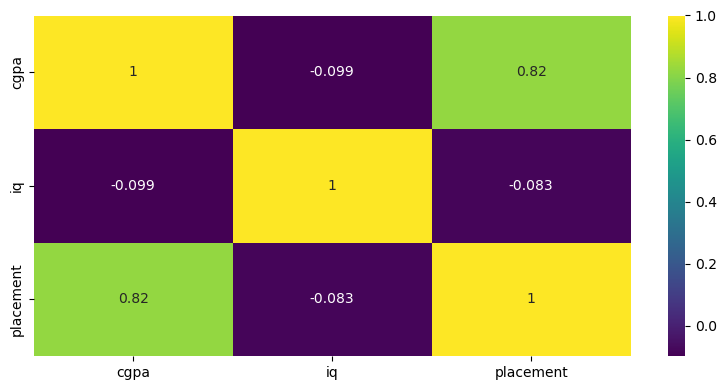

In [22]:
plt.figure(figsize=(8,4))
corr = df1.drop(['Unnamed: 0'],axis=1).corr()
sns.heatmap(corr,cmap='viridis',annot=True)
plt.tight_layout()
plt.show()

In [23]:
# plt.figure(figsize=(10,5))
# sns.lineplot(data=df1,x ='cgpa',y='iq',hue='placemnt',palette='spring')
# plt.title("Corelation Between Cgpa and iq")
# plt.show()

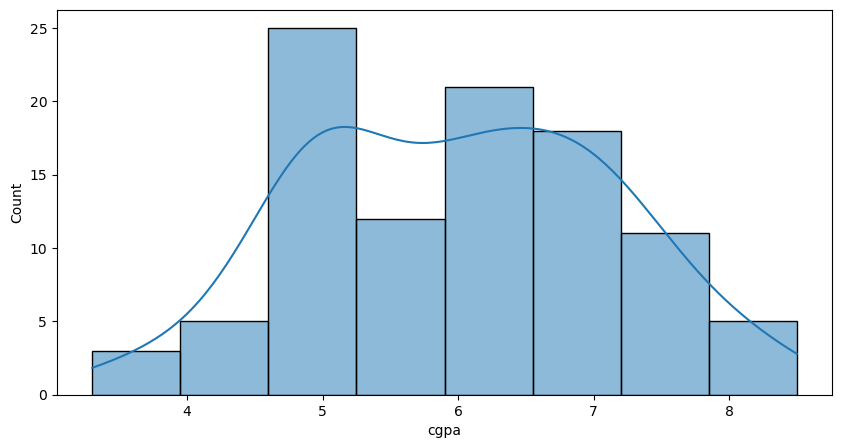

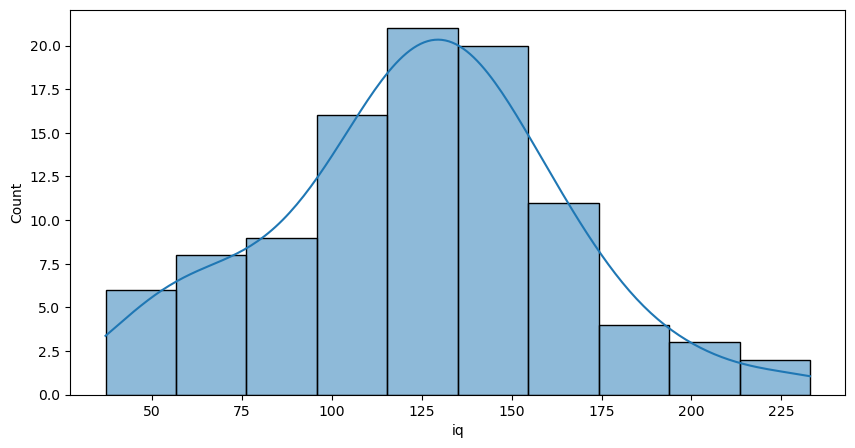

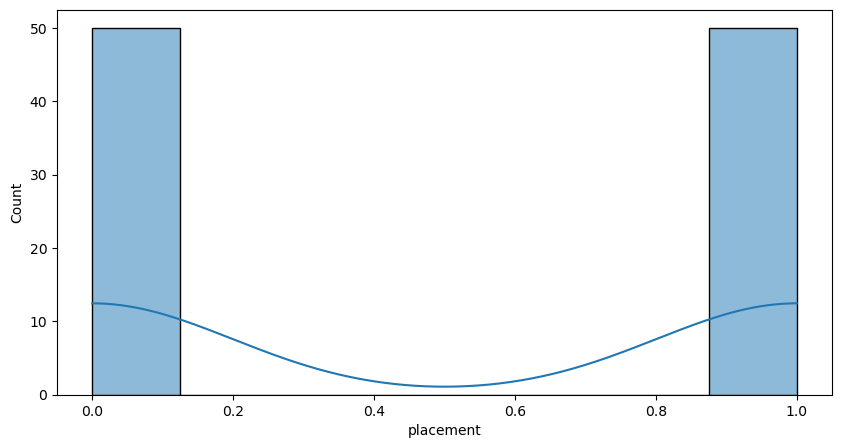

In [24]:
cols =  ['cgpa', 'iq', 'placement']
for i in cols:
    plt.figure(figsize=(10,5))
    sns.histplot(data = df1,x = i,kde = True)
    print("\n")
    plt.show()

### Unsupervisied Machine Learning - Clustering Algorithm

In [25]:
from sklearn.cluster import KMeans

In [26]:
X = df1[['cgpa', 'iq', 'placement']]

In [27]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

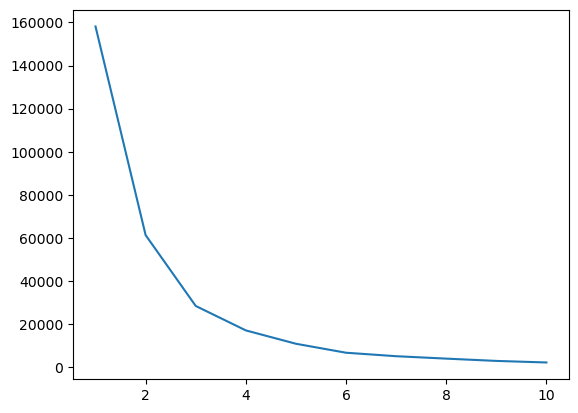

In [28]:
plt.plot(range(1,11),wcss)

In [29]:
from math import sqrt
sqrt(df1.shape[0])

10.0

In [30]:
km = KMeans(n_clusters=3)
km.fit(X)
pred = km.predict(X)
pred


array([0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2,
       1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 0])

In [31]:
df1['cluster'] = pred

In [32]:
df1['cluster'].value_counts()

0    55
1    24
2    21
Name: cluster, dtype: int64

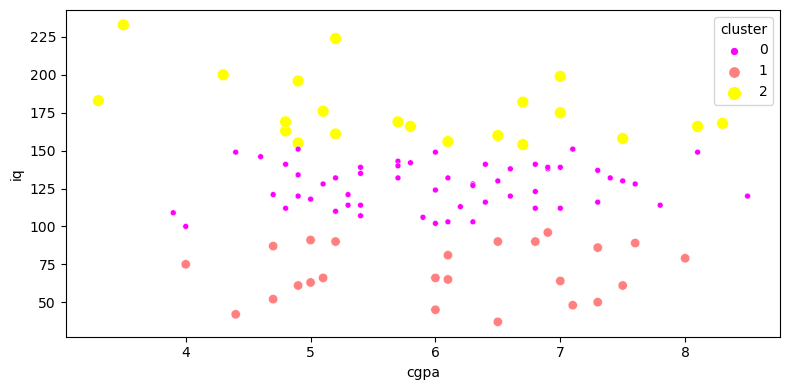

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df1,x ='cgpa',y='iq',hue='cluster',size='cluster',palette='spring')
plt.tight_layout()
plt.show()

### Supervisied Machine Learning - Linear Regression Model

In [34]:
X = df1[['cgpa', 'iq']]
y = df1['placement']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.69,random_state=42)

In [37]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred

array([ 1.1066701 ,  1.4625345 ,  0.63277829,  0.44746713,  1.03012511,
       -0.01277612,  0.07602178,  0.16033221,  0.42417083,  0.82440914,
       -0.299088  ,  1.14366506,  0.01057026,  0.53954299,  0.97943151,
        0.45335026,  0.11484895,  0.93949499,  0.29316763, -0.32831752,
        1.20656148, -0.08787537,  0.98714686,  1.1004005 ,  1.48771311,
        0.21657255,  0.09155265, -0.20657558,  0.0945443 ,  1.01271194,
        0.880263  ])

In [38]:
print("The R2 score is:",round(r2_score(y_test,pred),2),"%")

The R2 score is: 0.7 %


In [39]:
model.coef_

array([0.39213648, 0.00110935])

In [40]:
round(model.intercept_,2)

-1.98

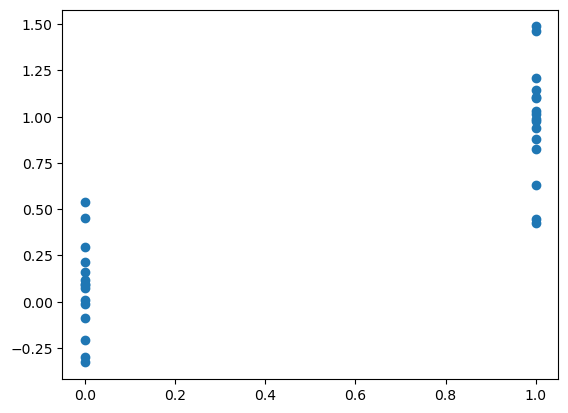

In [41]:
plt.scatter(y_test,pred)

In [42]:
df1.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement', 'cluster'], dtype='object')

### Supervised Machine Learning - Logistic Regression

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,f1_score,precision_score,confusion_matrix

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=42)

In [45]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)
pred1

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [46]:
print("The Accurancy Score of a model:",round(accuracy_score(y_test,pred1),2),"%")
print("The Precision Score of a model:",round(precision_score(y_test,pred1),2),"%")
print("The Confusion Matrix of a model:\n", confusion_matrix(y_test,pred1))
print("The f1 Score of a model:",round(f1_score(y_test,pred1),2),"%")

The Accurancy Score of a model: 0.93 %
The Precision Score of a model: 0.86 %
The Confusion Matrix of a model:
 [[33  5]
 [ 0 32]]
The f1 Score of a model: 0.93 %


In [47]:
error = pd.DataFrame({'Actual':y_test,'Predicted':pred1,'diff':y_test-pred1})
print(error)

    Actual  Predicted  diff
83       1          1     0
53       1          1     0
70       1          1     0
45       1          1     0
44       1          1     0
..     ...        ...   ...
67       0          0     0
46       0          0     0
68       0          0     0
61       1          1     0
97       1          1     0

[70 rows x 3 columns]


In [48]:
error.value_counts()

Actual  Predicted  diff
0       0           0      33
1       1           0      32
0       1          -1       5
dtype: int64

In [49]:
df1

,Unnamed: 0,cgpa,iq,placement,cluster
0,0,6.8,123.0,1,0
1,1,5.9,106.0,0,0
2,2,5.3,121.0,0,0
3,3,7.4,132.0,1,0
4,4,5.8,142.0,0,0
...,...,...,...,...,...
95,95,4.3,200.0,0,2
96,96,4.4,42.0,0,1
97,97,6.7,182.0,1,2
98,98,6.3,103.0,1,0


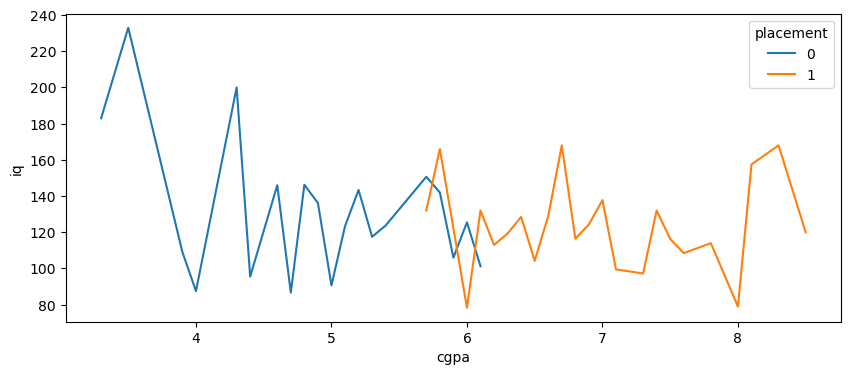

In [55]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df1,x='cgpa',y='iq',hue='placement',errorbar=None)
plt.show()